<a href="https://colab.research.google.com/github/Xpluxis/pratice/blob/main/%E6%95%B8%E5%AD%97%E8%BE%A8%E8%AD%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 載入資料

In [12]:
from google.colab import files
import numpy as np
uploaded = files.upload()

# 讀取.npz檔案中的數組
data = np.load('mnist.npz')

Saving mnist.npz to mnist (1).npz


# 辨識率學習

In [70]:
import tensorflow as tf
from tensorflow import keras

# 構建模型
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# 編譯模型
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 加載數據
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# 標準化數據
x_train, x_test = x_train / 255.0, x_test / 255.0

# 訓練模型
model.fit(x_train, y_train, epochs=10)

# 評估模型
model.evaluate(x_test, y_test)


Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2604 - accuracy: 0.9247
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1135 - accuracy: 0.9667
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0781 - accuracy: 0.9760
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0576 - accuracy: 0.9820
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0444 - accuracy: 0.9864
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0364 - accuracy: 0.9884
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0288 - accuracy: 0.9909
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0238 - accuracy: 0.9927
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0193 - accuracy: 0.9939
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0927

[0.09272696077823639, 0.9761999845504761]

#Classification Report做法

In [68]:
from sklearn.metrics import  classification_report
y =  sorted(y_test)
correct_predictions = []
digit_accuracy = {}
# 用模型對測試集進行預測
predictions = model.predict(x_test)
for i in range(10):
    indices = y_test == i
    correct_predictions.append(predictions[indices].argmax(axis=1))
# 將陣列合併成一個列表，並且將嵌套的陣列展平
flattened_list = [item for sublist in correct_predictions for item in sublist]
# 計算分類報告
class_report = classification_report(y, flattened_list)
print("\nClassification Report:")
print(class_report)

313/313 [==============================] - 1s 2ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.98      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.96      0.98      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



#confusion_matrix做法

In [67]:
from sklearn.metrics import confusion_matrix
y =  sorted(y_test)
correct_predictions = []
digit_accuracy = {}
# 用模型對測試集進行預測
predictions = model.predict(x_test)
for i in range(10):
    indices = y_test == i
    correct_predictions.append(predictions[indices].argmax(axis=1))
# 將陣列合併成一個列表，並且將嵌套的陣列展平
flattened_list = [item for sublist in correct_predictions for item in sublist]
conf_matrix = confusion_matrix(y, flattened_list)
print("Confusion Matrix:")
print(conf_matrix)
for i in range(10):
    digit_accuracy[str(i)] = conf_matrix[i][i]/sum(conf_matrix[i])
print(digit_accuracy)

313/313 [==============================] - 1s 4ms/step
Confusion Matrix:
[[ 970    0    3    0    0    0    5    1    1    0]
 [   1 1115    7    3    0    2    2    1    4    0]
 [   5    0 1003    2    3    1    3    5   10    0]
 [   0    0    7  987    0    2    1    3    3    7]
 [   2    0    3    0  957    1    5    3    3    8]
 [   2    0    0   11    0  868    4    0    6    1]
 [   2    2    2    1    4    4  942    0    1    0]
 [   2    2   12    5    2    0    0  984    7   14]
 [   2    0    1    3    5    2    0    2  954    5]
 [   3    2    0    0   11    8    0    0    0  985]]
{'0': 0.9897959183673469, '1': 0.9823788546255506, '2': 0.9718992248062015, '3': 0.9772277227722772, '4': 0.9745417515274949, '5': 0.9730941704035875, '6': 0.9832985386221295, '7': 0.9571984435797666, '8': 0.9794661190965093, '9': 0.9762140733399405}


#布林運算做法

In [69]:
# 用模型對測試集進行預測
predictions = model.predict(x_test)
digit_accuracy = {}
for i in range(10):
    indices = y_test == i
    correct_predictions = predictions[indices].argmax(axis=1) == y_test[indices]
    accuracy = correct_predictions.mean()
    digit_accuracy[str(i)] = accuracy
print("數字識別率:", digit_accuracy)

313/313 [==============================] - 2s 7ms/step
數字識別率: {'0': 0.9897959183673469, '1': 0.9823788546255506, '2': 0.9718992248062015, '3': 0.9772277227722772, '4': 0.9745417515274949, '5': 0.9730941704035875, '6': 0.9832985386221295, '7': 0.9571984435797666, '8': 0.9794661190965093, '9': 0.9762140733399405}


#圖形繪製

Text(0.5, 1.0, 'Accuracy for Each Digit')

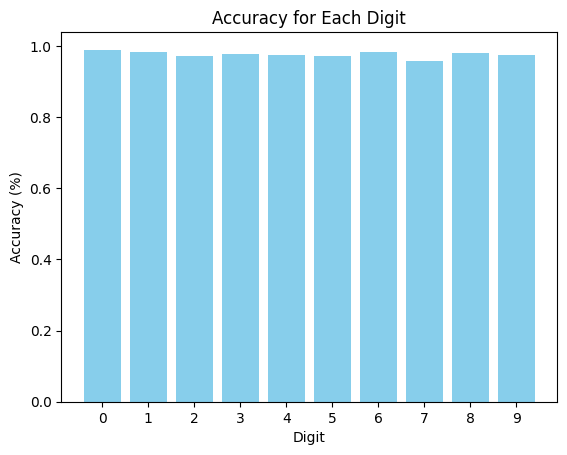

In [44]:
import matplotlib.pyplot as plt
# 繪製長條圖
plt.bar(digit_accuracy.keys(), digit_accuracy.values(), color='skyblue')
plt.xlabel('Digit')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy for Each Digit')